In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")


# 1. LOAD DATA

In [45]:
df = pd.read_csv("employees_performance.csv")
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [46]:
df.head()

,EmployeeID,Department,Education,ExperienceYears,Age,TrainingHours,PerformanceRating
0,1,Sales,Bachelor,1,22,10,3
1,2,HR,Master,3,25,20,4
2,3,IT,PhD,5,29,30,5
3,4,Finance,Bachelor,7,35,40,2
4,5,Marketing,Master,10,40,50,4


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         20 non-null     int64 
 1   Department         20 non-null     object
 2   Education          20 non-null     object
 3   ExperienceYears    20 non-null     int64 
 4   Age                20 non-null     int64 
 5   TrainingHours      20 non-null     int64 
 6   PerformanceRating  20 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.2+ KB


### 2. DATA CLEANING

In [48]:
     # Remove duplicates
df.drop_duplicates(inplace=True)

In [49]:
df.isnull().sum()

EmployeeID           0
Department           0
Education            0
ExperienceYears      0
Age                  0
TrainingHours        0
PerformanceRating    0
dtype: int64

In [50]:
df.fillna(df.mode().iloc[0], inplace=True)

In [51]:
# Drop irrelevant identifier columns if exist
for col in ["EmployeeID", "Emp_ID", "ID"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

### 3. Data Visualization

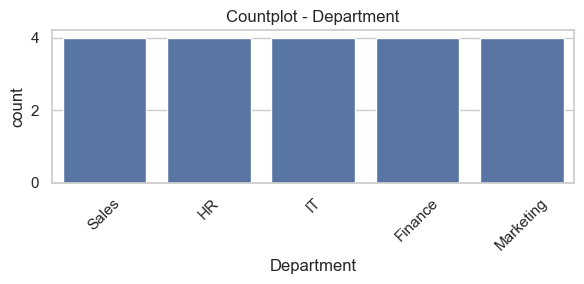

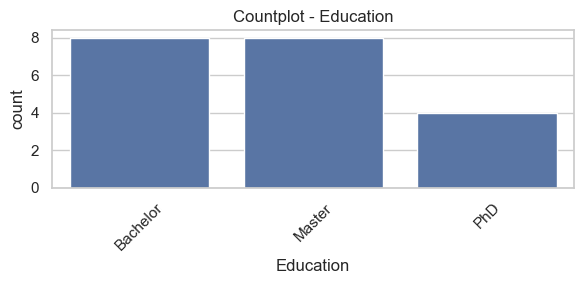

In [52]:
# Countplots for categorical columns
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

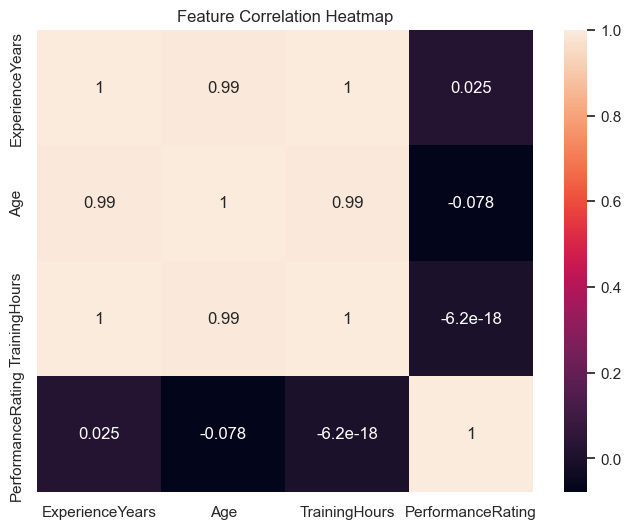

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Predictive Model

In [54]:
TARGET = "PerformanceRating"

X = df.drop(columns=[TARGET])
y = df[TARGET]

In [55]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ], remainder="passthrough"
)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [67]:
X_train.shape

(15, 5)

In [68]:
X_test.shape

(5, 5)

In [59]:
model = RandomForestClassifier(n_estimators=200, random_state=42)

In [60]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
model.fit(X_train_encoded, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [69]:
y_pred = model.predict(X_test_encoded)

# MODEL EVALUATION

In [62]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [66]:
feature_names = (
    preprocessor.named_transformers_["cat"]
    .get_feature_names_out(cat_cols).tolist() + num_cols)

In [64]:
importances = pd.Series(model.feature_importances_, index=feature_names)
top_features = importances.sort_values(ascending=False).head(10)

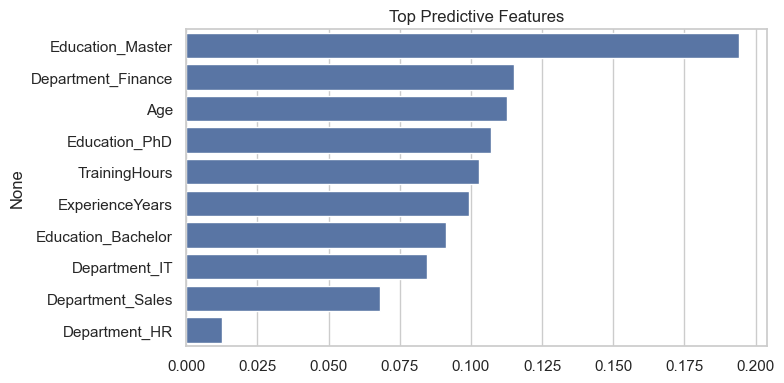

In [65]:
plt.figure(figsize=(8,4))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top Predictive Features")
plt.tight_layout()
plt.show()